In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [47]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: c:\users\asus\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [16]:
pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: c:\users\asus\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [17]:
df = pd.read_csv('C:/Users/Asus/OneDrive/Desktop/mini project 5th sem/archive/Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [18]:
df.shape

(9990, 60)

In [19]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [20]:
df = df.drop(labels = 'filename', axis = 1)

In [21]:
df

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [22]:
recording = "C:/Users/Asus/OneDrive/Desktop/mini project 5th sem/archive/Data/genres_original/country/country.00050.wav"
data, sr = librosa.load(recording)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [23]:
pip install numba --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: c:\users\asus\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [24]:
# librosa.load(recording, sr = 45600)
print(data)
print(sr)

[ 0.0461731   0.05691528  0.00158691 ... -0.05786133 -0.10861206
 -0.12380981]
22050


In [25]:
import IPython
IPython.display.Audio(data, rate = sr)

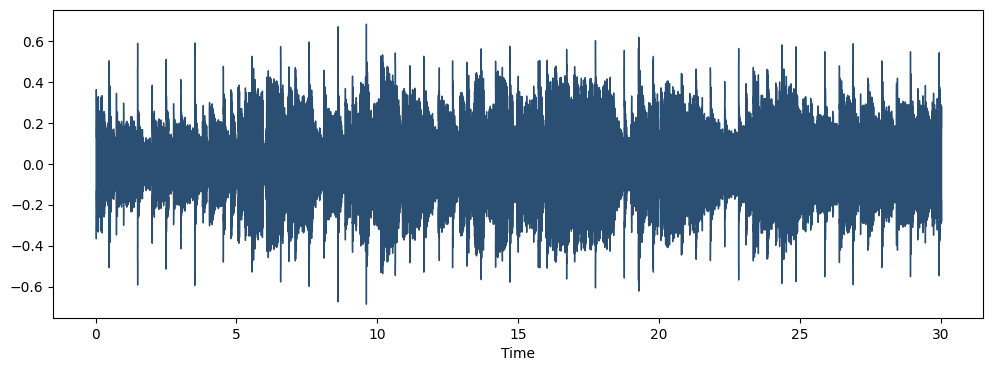

In [26]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, color = "#2B4F72")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_11984\2059516261.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')


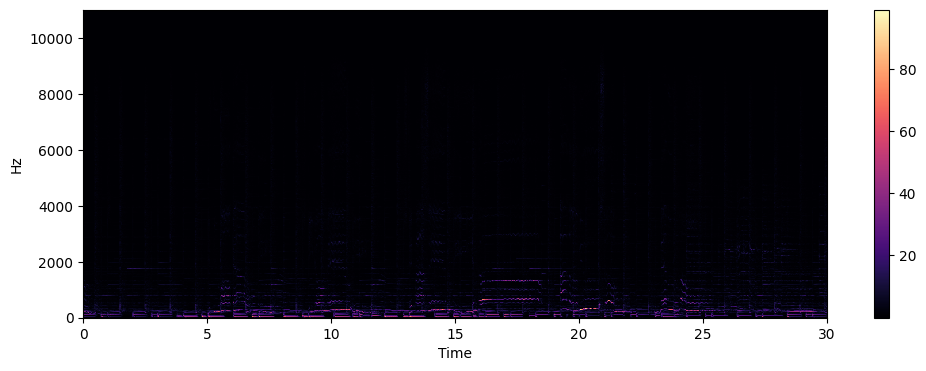

In [27]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize = (12,4))
librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

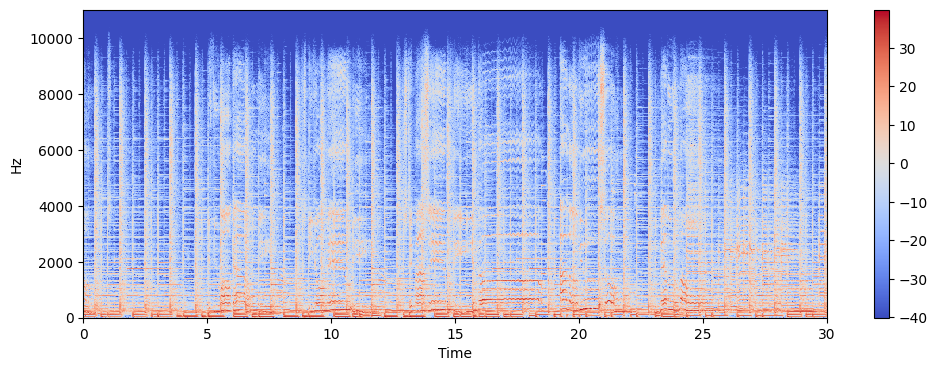

In [28]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize = (12,4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

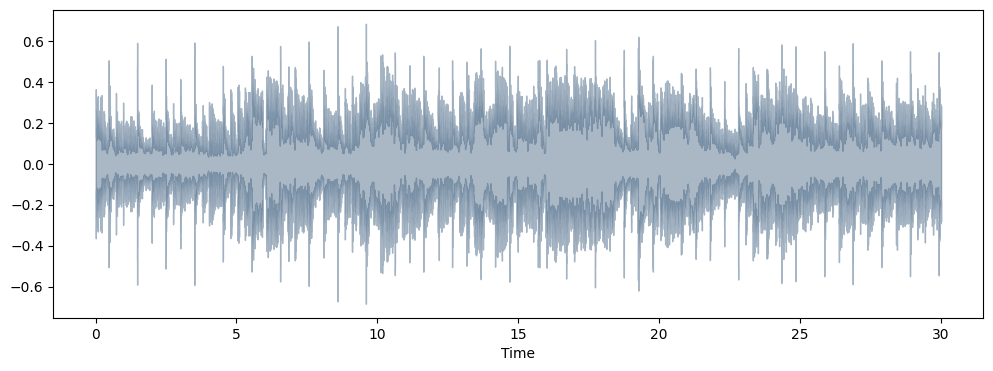

In [29]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(y=data + 0.01, sr=sr)[0]
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sr, alpha = 0.4, color = "#2B4F72")

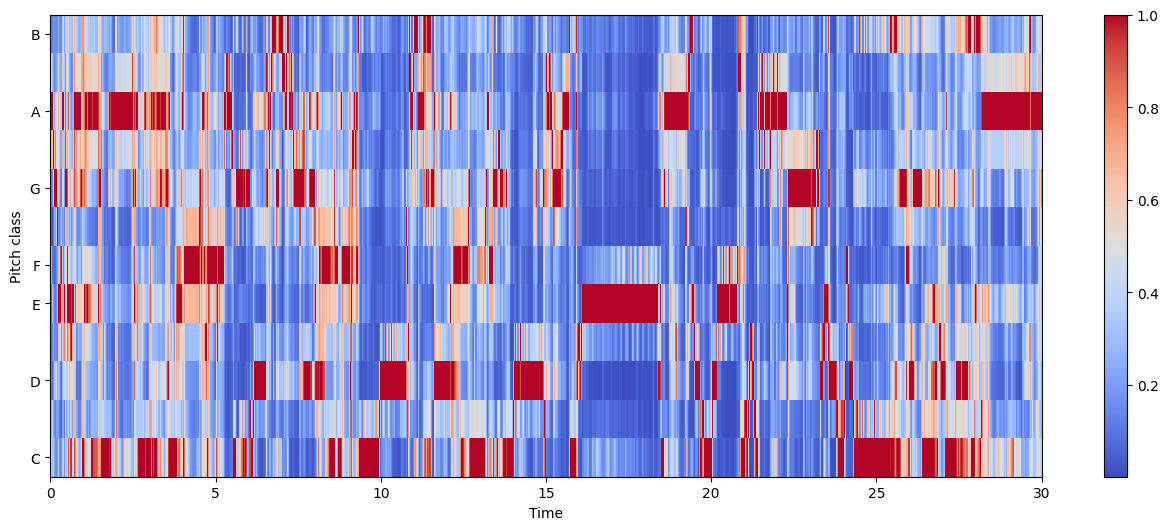

In [30]:
chroma = librosa.feature.chroma_stft(y=data , sr=sr)
plt.figure(figsize=(16,6))
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis = 'chroma', cmap = 'coolwarm')
plt.colorbar()
plt.show()

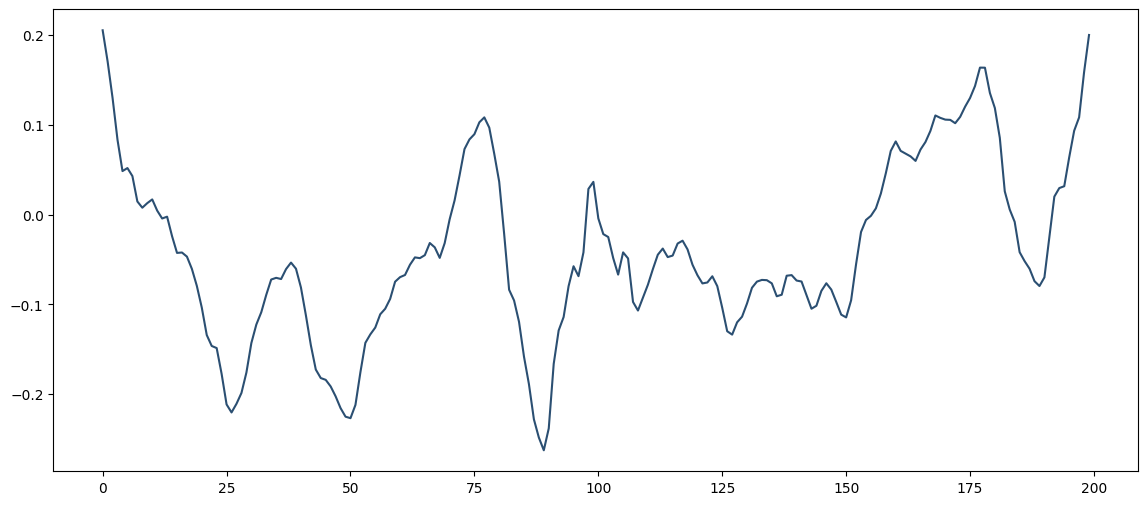

In [31]:
start = 1000
end = 1200
plt.figure(figsize=(14,6))
plt.plot(data[start:end], color = "#2B4F72")

In [32]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad=False)
print("Number of Zero - Crossings : ", sum(zero_cross_rate))

Number of Zero - Crossings :  8


In [33]:
class_list = df.iloc[:,-1]
convertor = LabelEncoder()

In [34]:
y = convertor.fit_transform(class_list)

In [35]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [36]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [37]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype = float))

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.30)

In [39]:
len(Y_train)

6993

In [40]:
len(Y_test)

2997

In [41]:
from keras.models import Sequential

In [42]:
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
    return model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size)
    

In [43]:
def plotValidate(history):
    print("Validation accuracy : ", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [44]:
import keras as k
model = k.models.Sequential([k.layers.Dense(512, activation = 'relu', input_shape=(X_train.shape[1],)),k.layers.Dropout(0.2), k.layers.Dense(256, activation='relu'), k.layers.Dropout(0.2), k.layers.Dense(128, activation='relu'), k.layers.Dropout(0.2), k.layers.Dense(64, activation='relu'), k.layers.Dropout(0.2), k.layers.Dense(10, activation='softmax'),])
print(model.summary())
model_history = trainModel(model = model, epochs = 600, optimizer = 'adam')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                

Epoch 98/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.4347 - val_accuracy: 0.9109
Epoch 99/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0368 - accuracy: 0.9896 - val_loss: 0.4571 - val_accuracy: 0.9079
Epoch 100/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0475 - accuracy: 0.9844 - val_loss: 0.4449 - val_accuracy: 0.9059
Epoch 101/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0431 - accuracy: 0.9870 - val_loss: 0.4344 - val_accuracy: 0.9089
Epoch 102/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.4232 - val_accuracy: 0.9142
Epoch 103/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0353 - accuracy: 0.9903 - val_loss: 0.4336 - val_accuracy: 0.9119
Epoch 104/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0351 - accuracy: 0.9888 - val_loss: 0.4597 - val_accuracy: 0.9126
E

55/55 [==============================] - 0s 6ms/step - loss: 0.0239 - accuracy: 0.9926 - val_loss: 0.4817 - val_accuracy: 0.9146
Epoch 213/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0161 - accuracy: 0.9944 - val_loss: 0.4761 - val_accuracy: 0.9166
Epoch 214/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.9937 - val_loss: 0.5035 - val_accuracy: 0.9156
Epoch 215/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.4595 - val_accuracy: 0.9176
Epoch 216/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0244 - accuracy: 0.9927 - val_loss: 0.4548 - val_accuracy: 0.9213
Epoch 217/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.4845 - val_accuracy: 0.9179
Epoch 218/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0186 - accuracy: 0.9933 - val_loss: 0.5309 - val_accuracy: 0.9139
Epoch 219/600

55/55 [==============================] - 0s 7ms/step - loss: 0.0122 - accuracy: 0.9967 - val_loss: 0.4657 - val_accuracy: 0.9243
Epoch 327/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.4613 - val_accuracy: 0.9259
Epoch 328/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 0.9980 - val_loss: 0.4976 - val_accuracy: 0.9233
Epoch 329/600
55/55 [==============================] - 0s 7ms/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.5619 - val_accuracy: 0.9206
Epoch 330/600
55/55 [==============================] - 0s 7ms/step - loss: 0.0148 - accuracy: 0.9943 - val_loss: 0.4607 - val_accuracy: 0.9256
Epoch 331/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.4944 - val_accuracy: 0.9213
Epoch 332/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0188 - accuracy: 0.9950 - val_loss: 0.4518 - val_accuracy: 0.9309
Epoch 333/600

55/55 [==============================] - 0s 6ms/step - loss: 0.0139 - accuracy: 0.9959 - val_loss: 0.5338 - val_accuracy: 0.9216
Epoch 441/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0160 - accuracy: 0.9953 - val_loss: 0.5581 - val_accuracy: 0.9223
Epoch 442/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.9959 - val_loss: 0.5269 - val_accuracy: 0.9253
Epoch 443/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.5497 - val_accuracy: 0.9229
Epoch 444/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0132 - accuracy: 0.9966 - val_loss: 0.5323 - val_accuracy: 0.9269
Epoch 445/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.5889 - val_accuracy: 0.9246
Epoch 446/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0085 - accuracy: 0.9970 - val_loss: 0.5716 - val_accuracy: 0.9263
Epoch 447/600

55/55 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.9966 - val_loss: 0.6458 - val_accuracy: 0.9236
Epoch 555/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0046 - accuracy: 0.9980 - val_loss: 0.6315 - val_accuracy: 0.9243
Epoch 556/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.6506 - val_accuracy: 0.9226
Epoch 557/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0055 - accuracy: 0.9974 - val_loss: 0.6643 - val_accuracy: 0.9266
Epoch 558/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.7225 - val_accuracy: 0.9229
Epoch 559/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0097 - accuracy: 0.9966 - val_loss: 0.7308 - val_accuracy: 0.9203
Epoch 560/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0185 - accuracy: 0.9946 - val_loss: 0.6195 - val_accuracy: 0.9203
Epoch 561/600

In [45]:
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size = 128)
print("Test loss : ", test_loss)
print("Best Test Accuracy : ", test_acc*100)

24/24 [==============================] - 0s 2ms/step - loss: 0.5720 - accuracy: 0.9276
Test loss :  0.5719508528709412
Best Test Accuracy :  92.7594244480133
